In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


### Creating the functional relation between X and Y

In [5]:
# Binarization
def g(x):
    if x < 0:
        return 0
    else:
        return 1
    

# function with Gaussian Noise
def f(x):
    y =  100*np.cos(np.sum(x,axis=1)) - np.sum(x,axis=1)**2 + 5*np.random.normal(0,1, 10000)
    return np.array(list(map(g,y)))

In [6]:
#Creating X and Y

x = np.array([[random.randint(0, 1) for i in range(10)] for i in range(10000)])
y = f(x).reshape(-1,1)

Proportion y = 0 -> 0.4843% and y = 1 -> 0.5157%


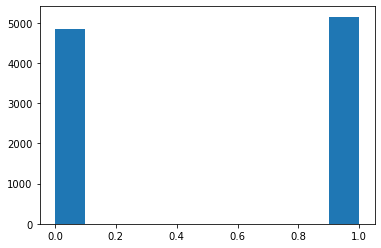

In [7]:
#Checking the proportion

print('Proportion y = 0 -> {}% and y = 1 -> {}%'.format(len(y[y==0])/len(y),len(y[y==1])/len(y)))
plt.hist(y)
plt.show()

### Mutual information

\begin{align}
I(X;Y) & = \sum_{x\in X, y\in Y}P(x,y)\log\Big(\frac{P(x,y)}{P(x)P(y)}\Big) \\
& = \sum_{x\in X}\Big[P(x,y=0)\log\Big(\frac{P(x,y=0)}{P(x)P(y=0)}\Big) + P(x,y=1)\log\Big(\frac{P(x,y=1)}{P(x)P(y=1)}\Big)\Big] \\
\end{align}

In [8]:
##Entropy
def entropy(Y):
    """
    Shanon Entropy
    """
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en

#Joint Entropy
def jEntropy(Y,X):
    """
    H(Y;X)
    """
    YX = np.c_[Y,X]
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    """
    H(Y|X) = H(Y;X) - H(X)
    """
    return jEntropy(Y, X) - entropy(X)


#Mutual Information
def Mutual_Info(Y, X):
    """
    I(Y;X) = H(Y) - H(Y|X)
    """
    return entropy(Y) - cEntropy(Y,X)

In [9]:
I_XY = Mutual_Info(y,x)
print('Estimated mutual information: {:f}'.format(I_XY))

Estimated mutual information: 0.826361


### Creating the neural network

In [23]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

input_shape = len(X_train[0])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

layers = [3,2,1]
EPOCHS = 100
BATCH_SIZE = 180

model = Sequential([
  Dense(layers[0], activation='tanh',input_shape=(input_shape,)),
  Dense(layers[1],activation='tanh'),
  Dense(layers[2],activation='sigmoid')
])

model.compile(optimizer='SGD', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

#### Saving the layers output on each epoch

In [26]:
from keras.callbacks import LambdaCallback
from keras import backend as K


activations_list = [] #[epoch][layer][0][X][unit]

def save_activations(model):
    outputs = [layer.output for layer in model.layers]
    functors = [K.function([model.input],[out]) for out in outputs]
    layer_activations = [f([X_train]) for f in functors]
    activations_list.append(layer_activations)

activations_callback = LambdaCallback(on_epoch_end = lambda batch, logs:save_activations(model))

In [27]:
result = model.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks =[activations_callback])
loss, acc = model.evaluate(X_test,y_test)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")


Epoch 1/100
10/39 [======>.......................] - ETA: 0s - loss: 0.8492 - accuracy: 0.4367 

2022-12-13 09:28:22.311260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 1s 7ms/step - loss: 0.8283 - accuracy: 0.4380
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 0.7877 - accuracy: 0.4401
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7623 - accuracy: 0.4517
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7461 - accuracy: 0.4603
Epoch 5/100
39/39 [==============================] - 0s 6ms/step - loss: 0.7352 - accuracy: 0.4766
Epoch 6/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7276 - accuracy: 0.4864
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7220 - accuracy: 0.4900
Epoch 8/100
39/39 [==============================] - 0s 6ms/step - loss: 0.7176 - accuracy: 0.4951
Epoch 9/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7140 - accuracy: 0.4957
Epoch 10/100
39/39 [==============================] - 0s 5ms/step - loss: 0.7109 - accuracy: 0.5037
Epoch 11/100
39/39 [=

2022-12-13 09:28:45.795898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 0s 2ms/step


2022-12-13 09:28:46.262041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


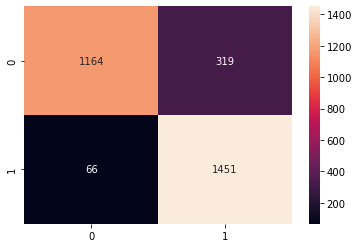

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
 
    
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')
plt.show()

## Information plane

In [29]:
# Discretization of continous values from the layers
def discretization(activations_list,bins,layers, EPOCHS):
## -------------------------------------
#     df: DataFrame
#     bins: int
#     layers: list with the number of neurons in each layer
#     EPOCHS: int
## -----------------------------------
    n_bins = bins

    for layer in range(0,len(layers)):
        for epoch in range(0,EPOCHS):
            bins = np.linspace(min(np.min(activations_list[epoch][layer][0],axis=1)),
                               max(np.max(activations_list[epoch][layer][0],axis=1)), n_bins+1)
            activations_list[epoch][layer][0] = np.digitize(activations_list[epoch][layer][0], bins)
            
    return activations_list

In [30]:
# Discretize the continous output of the layers
activations_list = discretization(activations_list,30, layers, EPOCHS)

In [31]:
# Calculating I(X,T) and I(T,Y)
def information_plane(X,Y,activations_list, layers, EPOCHS):

    I_XT = np.zeros((len(layers),EPOCHS))
    I_TY = np.zeros((len(layers),EPOCHS))
    
    for layer in range(0,len(layers)):
        for epoch in range(0,EPOCHS):
            I_XT[layer,epoch] = Mutual_Info(activations_list[epoch][layer][0],X)
            I_TY[layer,epoch] = Mutual_Info(activations_list[epoch][layer][0],Y)
            
    return I_XT,I_TY

In [32]:
# Calculating I(X,T) and I(T,Y)
information_plane = information_plane(X_train,y_train,activations_list, layers, EPOCHS)

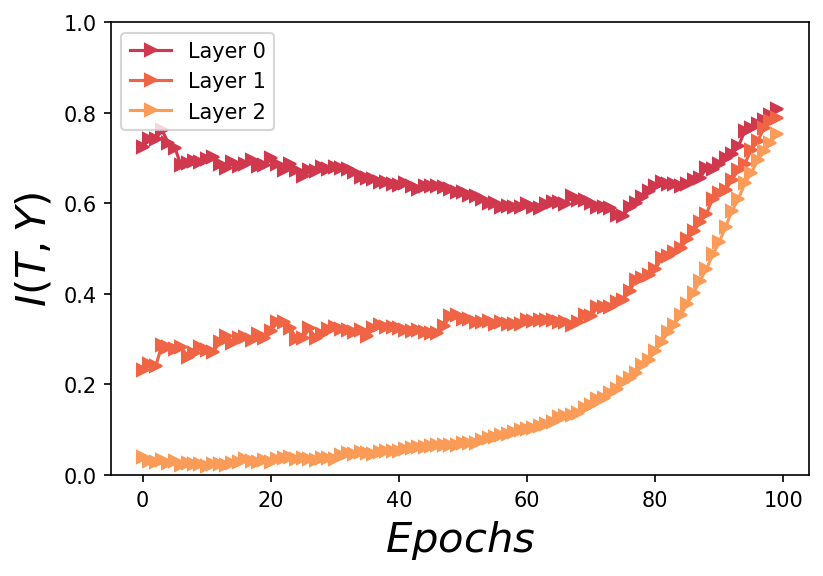

In [33]:
plt.figure(dpi=150)
with sns.color_palette("Spectral", n_colors=10):
    
    for i in range(0,len(layers)):
        plt.plot(np.arange(0,EPOCHS,1),information_plane[1][i,:], '->',label='Layer {}'.format(str(i)))
        
    plt.xlabel(r"$Epochs$")
    plt.ylabel(r"$I(T,Y)$")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

In [34]:
def plot_information_plane(IXT_array, ITY_array, num_epochs, every_n, I_XY):
    assert len(IXT_array) == len(ITY_array)

    max_index = len(IXT_array)

    plt.figure(figsize=(12, 6),dpi=150)
    plt.xlabel(r'$I(X;T)$')
    plt.ylabel(r'$I(T;Y)$')

    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0, 1, num_epochs)]
    cmap_layer = plt.get_cmap('Greys')
    clayer = [cmap_layer(i) for i in np.linspace(0, 1, max_index)]

    for i in range(0, max_index):
        IXT = IXT_array[i, :]
        ITY = ITY_array[i, :]

        plt.plot(IXT,ITY,color=clayer[i],linestyle=None,linewidth=2,label='Layer {}'.format(str(i)))
        plt.scatter(IXT,ITY,marker='o',c=colors,s=200,alpha=1)#,zorder=10)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    cbar = plt.colorbar(sm, ticks=[])
    cbar.set_label('Num epochs')
    cbar.ax.text(0.5, -0.01, 0, transform=cbar.ax.transAxes, va='top', ha='center')
    cbar.ax.text(0.5, 1.0, str(num_epochs), transform=cbar.ax.transAxes, va='bottom', ha='center')
    plt.axhline(y = I_XY, color = 'red', linestyle = ':', label=r'$I[X,Y]$')
    plt.legend()
    plt.show()

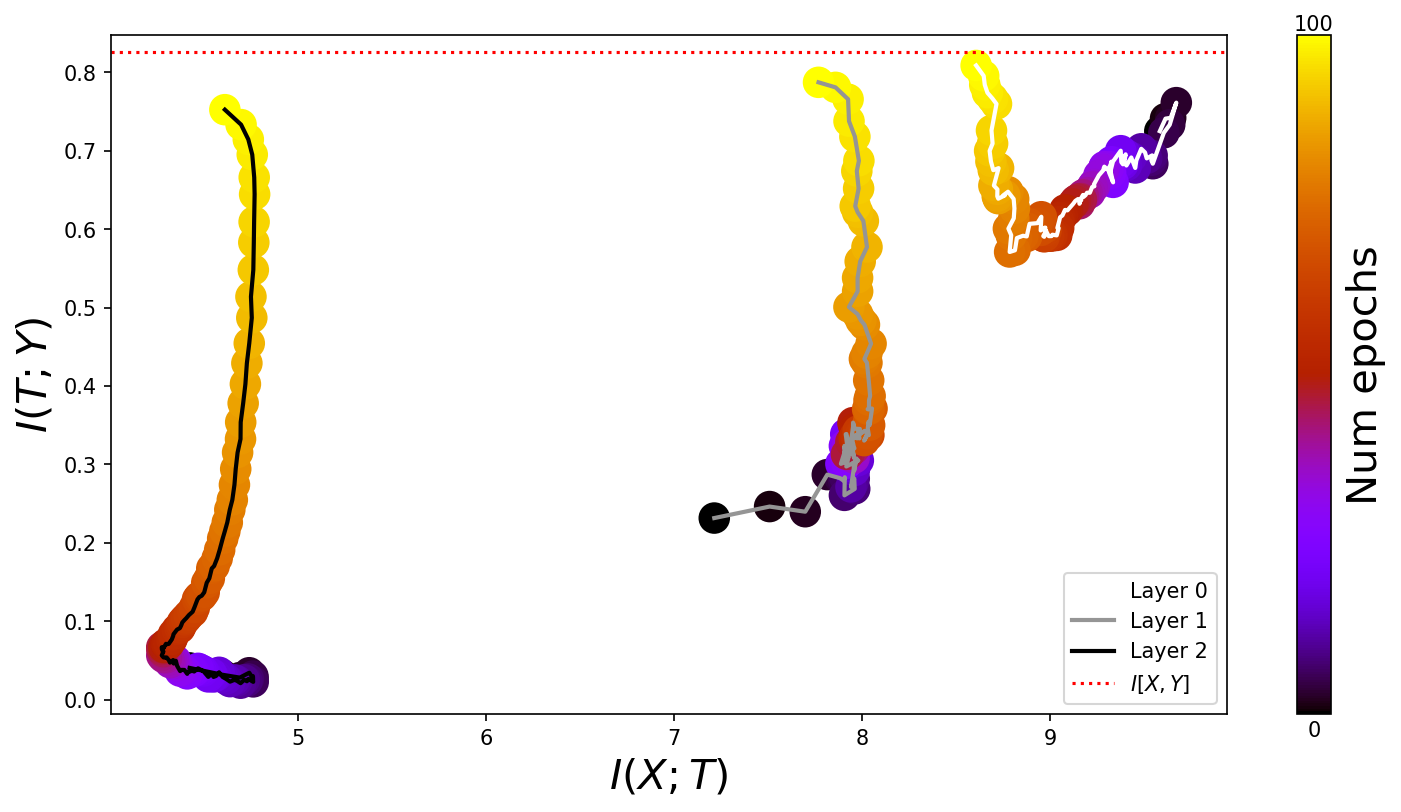

In [35]:
plot_information_plane(information_plane[0],information_plane[1],EPOCHS,1,I_XY)